Stock price analysis has been a critical area of research and is one of the top applications of machine learning. Here, we will use an LSTM network to train our model with Reliance stocks data.

# Stock Market?
A stock market is a public market where you can buy and sell shares for publicly listed companies. The stocks, also known as equities, represent ownership in the company. The stock exchange is the mediator that allows the buying and selling of shares.  
# Importance?
Stock markets help companies to raise capital.  
It helps generate personal wealth.  
Stock markets serve as an indicator of the state of the economy.  
It is a widely used source for people to invest money in companies with high growth potential.  
# Stock Price Prediction
Stock Price Prediction using machine learning helps you discover the future value of company stock and other financial assets traded on an exchange. The entire idea of predicting stock prices is to gain significant profits. Predicting how the stock market will perform is a hard task to do. There are other factors involved in the prediction, such as physical and psychological factors, rational and irrational behavior, and so on. All these factors combine to make share prices dynamic and volatile. This makes it very difficult to predict stock prices with high accuracy.  

# Understanding Long Short Term Memory Network
Here, we will use a Long Short Term Memory Network (LSTM) for building your model to predict the stock prices of Google.

LTSMs are a type of Recurrent Neural Network for learning long-term dependencies. It is commonly used for processing and predicting time-series data.  
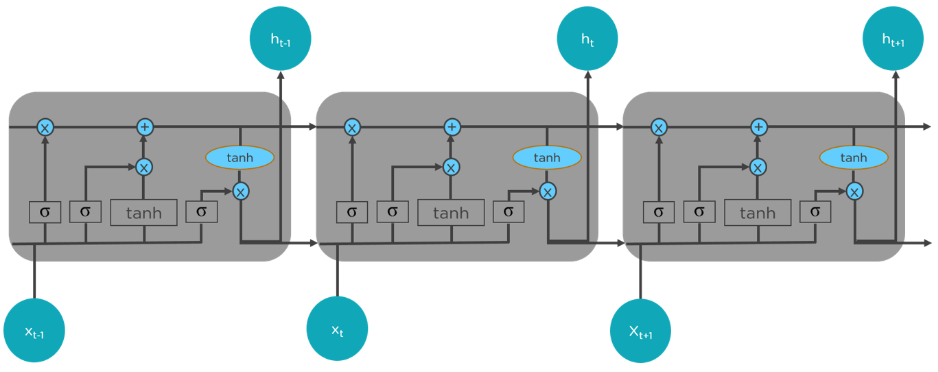  
From the image on the top, you can see LSTMs have a chain-like structure. General RNNs have a single neural network layer. LSTMs, on the other hand, have four interacting layers communicating extraordinarily.  
LSTMs work in a three-step process.  
The first step in LSTM is to decide which information to be omitted from the cell in that particular time step. It is decided with the help of a sigmoid function. It looks at the previous state (ht-1) and the current input xt and computes the function.  
There are two functions in the second layer. The first is the sigmoid function, and the second is the tanh function. The sigmoid function decides which values to let through (0 or 1). The tanh function gives the weightage to the values passed, deciding their level of importance from -1 to 1.  
The third step is to decide what will be the final output. First, you need to run a sigmoid layer which determines what parts of the cell state make it to the output. Then, you must put the cell state through the tanh function to push the values between -1 and 1 and multiply it by the output of the sigmoid gate.

# reliance Stock Price Prediction with Machine Learning

To predict the stock prices of Reliance with machine learning, We will be using the LSTM neural network as it is one of the best approaches for regression analysis and time series forecasting. So here, I will start by importing the necessary Python libraries and collecting the latest stock price data of Reliance:

Import Libraries and load data set

In [1]:
import requests

import pip
pip.main(['install', 'pandas_datareader'])

import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as web
import yfinance as yf
import datetime
from datetime import date, timedelta

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: pandas_datareader in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (0.10.0)

Requirement already satisfied: lxml in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from pandas_datareader) (4.9.1)

Requirement already satisfied: pandas>=0.23 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from pandas_datareader) (1.4.3)

Requirement already satisfied: requests>=2.19.0 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from pandas_datareader) (2.28.1)

Requirement already satisfied: numpy>=1.18.5 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from pandas>=0.23->pandas_datareader) (1.23.1)

Requirement already satisfied: pytz>=2020.1 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from pandas>=0.23->pandas_datareader) (2022.1)

Requirement already satisfied: python-dateutil>=2.8.1 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from pandas>=0.23->pandas_datareader) (2.8.2)

Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from requests>=2.19.0->pandas_datareader) (1.26.12)

Requirement already satisfied: charset-normalizer<3,>=2 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from requests>=2.19.0->pandas_datareader) (2.1.1)

Requirement already satisfied: certifi>=2017.4.17 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from requests>=2.19.0->pandas_datareader) (2022.6.15)

Requirement already satisfied: idna<4,>=2.5 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from requests>=2.19.0->pandas_datareader) (3.3)

Requirement already satisfied: six>=1.5 in c:\users\harsh wadhwa\appdata\local\programs\python\python39\lib\site-packages (from python-dateutil>=2.8.1->pandas>=0.23->pandas_datareader) (1.16.0)

WARNING: You are using pip version 22.0.4; however, version 22.2.2 is available.
You should consider upgrading via the 'c:\Users\Harsh Wadhwa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=300)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = web.DataReader('RELIANCE.NS', data_source= 'yahoo', start = start_date, end = end_date)
# data = pd.read_csv('NFLX.csv')

# data = yf.download('NFLX', start=start_date, end=end_date, progress=False)
# data["Date"] = data.index
# data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
# data.reset_index(drop = True, inplace = True)
print(data.tail())

                   High          Low         Open        Close     Volume  \
Date                                                                        
2022-08-22  2631.300049  2586.000000  2617.000000  2606.600098  4371179.0   
2022-08-23  2653.199951  2591.350098  2594.000000  2646.800049  4466619.0   
2022-08-24  2670.000000  2635.350098  2640.100098  2639.750000  4785579.0   
2022-08-25  2662.899902  2622.600098  2648.949951  2632.050049  3632902.0   
2022-08-26  2650.000000  2607.000000  2633.000000  2618.000000  4956404.0   

              Adj Close  
Date                     
2022-08-22  2606.600098  
2022-08-23  2646.800049  
2022-08-24  2639.750000  
2022-08-25  2632.050049  
2022-08-26  2618.000000  


In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-01,2556.000000,2494.100098,2536.250000,2537.800049,7144532.0,2530.182373
2021-11-02,2548.000000,2495.250000,2545.000000,2500.800049,4877652.0,2493.293457
2021-11-03,2520.000000,2461.000000,2506.050049,2483.600098,5533120.0,2476.145020
2021-11-04,2504.899902,2490.000000,2492.949951,2498.850098,787160.0,2491.349365
2021-11-08,2520.000000,2456.399902,2519.399902,2501.949951,9385607.0,2494.439941


In [4]:
data.shape

(205, 6)

In [5]:
start_date

'2021-10-31'

In [6]:
end_date

'2022-08-27'

Open: The price of the stock at the beginning of the trading day.

High: The highest price of the stock on a trading day.

Low: The lowest price of the stock on a trading day.

Close: The last price of the stock before the trading day ends.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 205 entries, 2021-11-01 to 2022-08-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       205 non-null    float64
 1   Low        205 non-null    float64
 2   Open       205 non-null    float64
 3   Close      205 non-null    float64
 4   Volume     205 non-null    float64
 5   Adj Close  205 non-null    float64
dtypes: float64(6)
memory usage: 11.2 KB


In [8]:
# Check the Null and NA values
print("Null values:", data.isnull().values.sum())
print("NA values:", data.isna().values.any())

Null values: 0
NA values: False


The above dataset is collected using the yfinance API in Python. Now let’s visualize the stock price data of Reliance by using a candlestick chart as it gives a clear picture of the increase and decrease of stock prices:

In [9]:
!pip install plotly

You should consider upgrading via the 'C:\Users\Harsh Wadhwa\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [10]:
import plotly.graph_objects as go
data["Date"] = data.index

figure = go.Figure(data=[go.Candlestick(x=data["Date"], open=data["Open"], 
                                        high=data["High"], low=data["Low"], close=data["Close"])])
figure.update_layout(title = "reliance Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()
             

Now let’s have a look at the correlation of all the columns with the Close column:

In [11]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999938
Low          0.982083
High         0.981044
Open         0.947068
Volume      -0.013409
Name: Close, dtype: float64


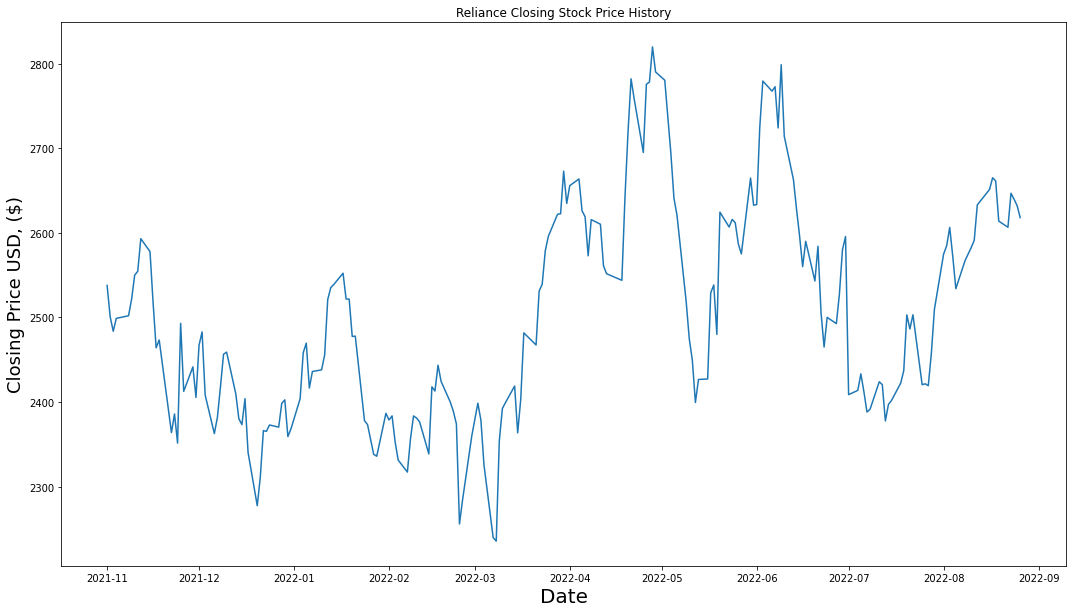

In [12]:
# Closing Price Stock Visual
# visualise the dataset and the closing price history through this period
# create a plot using the relevant variables

plt.figure(figsize=(18,10))
plt.title('Reliance Closing Stock Price History')
plt.plot(data['Close'])
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Closing Price INR', fontsize= 18)
plt.show()

In [13]:
# Create a new dataframe with a close column 
data= data.filter(['Close'])

# Convert the dataframe into a numpy array
dataset = data.values

# Get the rows so the model can be trained 

training_data_len = math.ceil(len(dataset) * 0.8) # training the data on about 80% and round the numbers up
training_data_len #print the length of the training dataset. 

164

In [14]:
data

,Close
Date,
2021-11-01,2537.800049
2021-11-02,2500.800049
2021-11-03,2483.600098
2021-11-04,2498.850098
2021-11-08,2501.949951
...,...
2022-08-22,2606.600098
2022-08-23,2646.800049
2022-08-24,2639.750000


In [15]:
dataset

array([[2537.80004883],
       [2500.80004883],
       [2483.60009766],
       [2498.85009766],
       [2501.94995117],
       [2521.69995117],
       [2549.89990234],
       [2554.55004883],
       [2593.10009766],
       [2577.80004883],
       [2517.89990234],
       [2464.        ],
       [2473.30004883],
       [2363.75      ],
       [2385.85009766],
       [2351.39990234],
       [2492.94995117],
       [2412.60009766],
       [2441.5       ],
       [2405.39990234],
       [2467.        ],
       [2482.85009766],
       [2408.25      ],
       [2362.60009766],
       [2381.85009766],
       [2418.10009766],
       [2456.44995117],
       [2458.94995117],
       [2409.64990234],
       [2380.14990234],
       [2373.19995117],
       [2403.89990234],
       [2340.44995117],
       [2277.35009766],
       [2311.25      ],
       [2366.10009766],
       [2365.25      ],
       [2372.80004883],
       [2370.25      ],
       [2398.39990234],
       [2402.5       ],
       [2359.100

In [16]:
# Scale the data as applying pre-processing is beneficial, helping the model before using neural network

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.51732694],
       [0.45400874],
       [0.42457441],
       [0.45067178],
       [0.45597657],
       [0.4897748 ],
       [0.53803346],
       [0.54599126],
       [0.61196207],
       [0.58577906],
       [0.48327176],
       [0.39103271],
       [0.40694791],
       [0.21947459],
       [0.25729455],
       [0.19833984],
       [0.44057484],
       [0.30307191],
       [0.35252839],
       [0.29075019],
       [0.39616661],
       [0.42329093],
       [0.29562757],
       [0.21750676],
       [0.25044934],
       [0.31248407],
       [0.37811229],
       [0.38239054],
       [0.29802323],
       [0.24753979],
       [0.23564632],
       [0.28818324],
       [0.17960115],
       [0.07161819],
       [0.12963119],
       [0.22349632],
       [0.22204155],
       [0.23496197],
       [0.23059806],
       [0.27877107],
       [0.28578758],
       [0.2115172 ],
       [0.22700416],
       [0.28809801],
       [0.38093619],
       [0.40061617],
       [0.30974582],
       [0.343

In [17]:
# will be using the dataset which is used for ***training***

train_data = scaled_data[0:training_data_len, :]


# a_train & # b_train *** split training dataset into a and b.

a_train = []
b_train = []

for i in range(60, len(train_data)):
    a_train.append(train_data[i-60:i, 0])
    b_train.append(train_data[i, 0])
    if i<= 61:
        print(a_train)
        print(b_train)
        print()

[array([0.51732694, 0.45400874, 0.42457441, 0.45067178, 0.45597657,
       0.4897748 , 0.53803346, 0.54599126, 0.61196207, 0.58577906,
       0.48327176, 0.39103271, 0.40694791, 0.21947459, 0.25729455,
       0.19833984, 0.44057484, 0.30307191, 0.35252839, 0.29075019,
       0.39616661, 0.42329093, 0.29562757, 0.21750676, 0.25044934,
       0.31248407, 0.37811229, 0.38239054, 0.29802323, 0.24753979,
       0.23564632, 0.28818324, 0.17960115, 0.07161819, 0.12963119,
       0.22349632, 0.22204155, 0.23496197, 0.23059806, 0.27877107,
       0.28578758, 0.2115172 , 0.22700416, 0.28809801, 0.38093619,
       0.40061617, 0.30974582, 0.34311623, 0.34653883, 0.37657228,
       0.48874827, 0.51304868, 0.51938042, 0.54205518, 0.4899461 ,
       0.48960392, 0.41404965, 0.41473442, 0.24368936, 0.23573197])]
[0.17557984172119667]

[array([0.51732694, 0.45400874, 0.42457441, 0.45067178, 0.45597657,
       0.4897748 , 0.53803346, 0.54599126, 0.61196207, 0.58577906,
       0.48327176, 0.39103271, 0.40

In [18]:
len(train_data)

164

In [19]:
# converting training data sets into numpy arrays 

a_train, b_train = np.array(a_train), np.array(b_train)

In [20]:
#rehspaing the data as the LTSM expects to be in 3 dimensional shape. Currently at 2 dimensional
a_train = np.reshape(a_train, (a_train.shape[0], a_train.shape[1], 1))
a_train.shape # two dimensional using rows x columns

(104, 60, 1)

## Building the LSTM Model

In [21]:
## Building the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (a_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [22]:
# Compiling the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
## Train the model
model.fit(a_train, b_train, batch_size=1, epochs=1)

104/104 [==============================] - 3s 14ms/step - loss: 0.0452


In [24]:
## Forming the new testing dataset 
## Creating a new array 

test_data = scaled_data[training_data_len - 60: , :]

# creating datasets a_test and b_test

a_test = []
b_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    a_test.append(test_data[i-60:i, 0])

In [25]:
# Convert testing dataset in a numpy array to use in the LSTM Model 

a_test = np.array(a_test)

In [26]:
# Reshape the data as data is 2 dimemsional but it needs to be 3 dimensional

a_test = np.reshape(a_test, (a_test.shape[0], a_test.shape[1], 1))

In [27]:
## Obtain the predicted prices from the models
# want the predictions to contain the same values as b_test dataset

predictions = model.predict(a_test)
predictions = scaler.inverse_transform(predictions) 

2/2 [==============================] - 1s 8ms/step


In [28]:
# obtain the root mean to check for model accuracy RMSE

rmse = np.sqrt(np.mean(predictions - b_test)**2)
rmse

0.6492056497713414

C:\Users\Harsh Wadhwa\AppData\Local\Temp\ipykernel_23176\3767338958.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



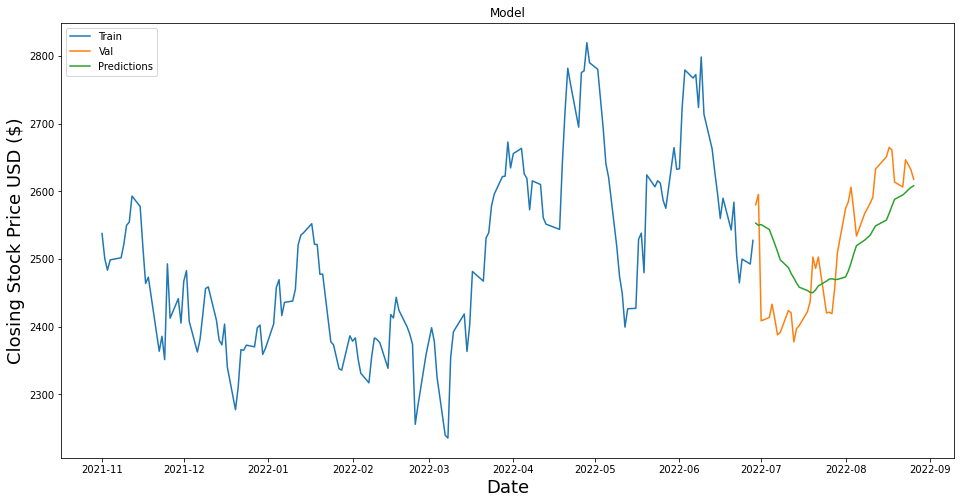

In [29]:
# plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualise the data through a plot

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Stock Price INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()


In [30]:
# comment: predictions and actual values are pretty close 
# get the actual closing price and predicted closing price in a table
valid

,Close,Predictions
Date,,
2022-06-29,2580.149902,2553.006836
2022-06-30,2595.649902,2549.979492
2022-07-01,2408.699951,2551.009521
2022-07-04,2413.699951,2543.780518
2022-07-05,2433.250000,2533.189209
2022-07-06,2411.850098,2522.457764
2022-07-07,2388.100098,2511.129150
2022-07-08,2391.399902,2498.985107
2022-07-11,2423.899902,2487.440674


In [37]:
reliance_quote = web.DataReader('RELIANCE.NS', data_source='yahoo', start= '2022-01-01', end= '2022-01-25')
# new dataframe for last 60 day closing price
new_df = reliance_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
A_test = []
A_test.append(last_60_days_scaled)
A_test = np.array(A_test)
A_test = np.reshape(A_test, (A_test.shape[0], A_test.shape[1], 1))
pred_price = model.predict(A_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 1s 821ms/step
[[2491.1335]]


In [32]:
# the model predicts that the closing price of reliance stock on 26th january 2022 will be 2491

In [41]:
# actual closing price of reliance stock on 26th january 2022 was:
reliance_quote1 = web.DataReader('RELIANCE.NS', data_source='yahoo', start= '2022-01-26', end= '2022-01-27')
print(reliance_quote1['Close'])

Date
2022-01-27    2338.100098
Name: Close, dtype: float64


## More Predictions:

In [34]:
reliance_quote4 = web.DataReader('RELIANCE.NS', data_source='yahoo', start= '2012-01-01', end= '2022-01-26')
# new dataframe for last 60 day closing price
new_df = reliance_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
A_test = []
A_test.append(last_60_days_scaled)
A_test = np.array(A_test)
A_test = np.reshape(A_test, (A_test.shape[0], A_test.shape[1], 1))
pred_price = model.predict(A_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 18ms/step
[[1544.2864]]


In [35]:
# reliance_quote_4 predicts that the closing price of reliance stock on 27th january 2022 will be 1544

In [36]:
# actual closing price of reliance stock on 27th january 2022 was:
reliance_quote5 = web.DataReader('RELIANCE.NS', data_source='yahoo', start= '2022-01-27', end= '2022-01-27')
print(reliance_quote1['Close'])

Date
2022-01-25    366.420013
2022-01-26    359.700012
Name: Close, dtype: float64


## Comments:
This model was used to predict the future closing price of reliance stock (NFLX) and it was understood that the prediction made by the trained model was off by a distance for the 26th January 2022. The model predicted that the closing price would be 474.23 however the actual price recorded for the stock by Yahoo was 359.70. A difference of 85.85.